In [1]:
import pandas as pd

file_path = 'history_data.csv'  # 将文件路径替换为你的CSV文件路径  
#data = pd.read_csv(file_path, encoding='GB2312', errors='ignore')
with open(file_path, 'r', encoding='gb2312', errors='ignore') as f:  
    content = pd.read_csv(f)
    # 去掉重复行
    # content = content.drop_duplicates() 
    # print(content)

    # for row in content.iterrows():  
    #     print(row[1])
    
    #将点评人数和分数规范化 
    for i in range(content.shape[0]):
        if len(content['number'][i]) > 3:
            content['number'][i] = content['number'][i][:-3]
            if (content['number'][i].endswith('万')):
                content['number'][i] = int(float(content['number'][i][:-1])*10000)
            content['number'][i] = int(content['number'][i])
        if len(content['mark'][i]) > 3 and not content['mark'][i].startswith("评"):
            content['mark'][i] = content['mark'][i][:-1]
            content['mark'][i] = float(content['mark'][i])
    content['number'] = content['number'].astype('int32')
    content['mark'] = content['mark'].astype('float')
    print(content)
    
# data['combined'] = data.iloc[:, :2].values.flatten()  # 将前两列拼接成一个新列
# result = data.drop_duplicates(subset='combined')  # 根据新列去重
# result = result.drop(columns='combined')  # 可选：删除拼接列

# output_file_path = 'history.csv'  # 将文件路径替换为你想要保存的去重后的CSV文件路径  
# result.to_csv(output_file_path, index=False)  # 将去重后的数据保存为新的CSV文件，不包含索引列（可选）

                              name      author  number  mark publish_time  \
0                  柏杨白话版资治通鉴（全72册）          柏杨    1644  87.0      2020年4月   
1                 半小时漫画大套装（套装共16册）  陈磊・半小时漫画团队    1495  92.2      2000年9月   
2    半小时漫画历史系列（共7册）（中国史1-5+世界史1-2）  陈磊・半小时漫画团队    4738  93.5      2021年5月   
3                     半小时漫画史记（全5册）  陈磊・半小时漫画团队    2788  94.2      2023年5月   
4            半小时漫画中国地理：西藏、青海、云南、贵州  陈磊・半小时漫画团队    5711  94.3      2023年8月   
..                             ...         ...     ...   ...          ...   
145                             庄子          庄子     301  87.1      2021年8月   
146                   庄子（中华经典指掌文库）       孙通海译注     469  88.9      2017年1月   
147            资治通鉴・横排版（胡三省注）294卷全  司R光胡三省 u寰宇     424  93.2      2018年5月   
148    走进博物馆（套装12册）：以物说史 以物证史 以物串史      陕西省文物局      46  92.5     2021年10月   
149                        左传（全二册）    左丘明 杜预集解     238  85.2      2015年7月   

                                               extract  
0    以史为鉴，知兴替，明得失。

In [2]:

from math import ceil
threshold = ceil(content.shape[0] * 0.2)
best_titles = content.nlargest(threshold,'number')
worst_titles = content.nsmallest(threshold,'number')
# df [[]] 获取 df, [] 获取 series
best_titles_text = "".join(best_titles['name'].values.tolist())
worst_titles_text = "".join(worst_titles['name'].values.tolist())


print(worst_titles['name'].values)
myli = worst_titles['name'].values.tolist()


['改革开放口述史' '战国策' '英国通史' '地理的故事（英文版）' '希特勒的克里斯玛' '十件文物里的中国故事'
 '走进博物馆（套装12册）：以物说史 以物证史 以物串史' '六千里运河 二十一座城' '雍正：天地古今惟一啸' '井冈山斗争口述史（全2册）'
 '大屠杀：一部新的历史' '汉书（中华古籍国学宝典文库）' '大地中国（北大教授韩茂莉的历史地理通识课）' '改革开放口述史' '中国建筑史'
 '中世纪：权力、信仰和现代世界的孕育' '权鉴' '世界地理全知道' '历史的棋局' '启功口述历史' '日本人口述“二战”史'
 '熊逸：纸上的精神旅行（春秋大义+正义从哪里来）' '抗战老兵口述历史' '中国古代战争的地理枢纽'
 '日本史・1600-2000：从德川幕府到平成时代' '环球国家地理百科全书：欧洲1' '虚构的犹太民族' '马伯庸作品合集（全24册）'
 '津巴多口述史' '二十四史：完本精校大全集（中华古籍国学宝典文库）']


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\24116\AppData\Local\Temp\jieba.cache
Loading model cost 0.417 seconds.
Prefix dict has been built successfully.
C:\Users\24116\AppData\Local\Temp\ipykernel_13676\245076870.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask=imread('wordcloud_back.png'),


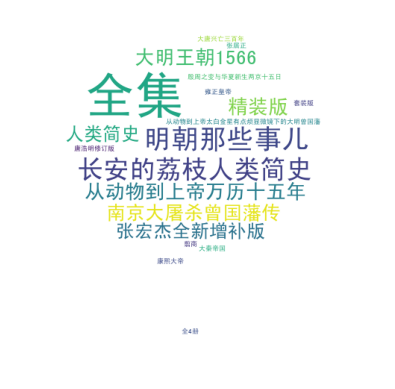

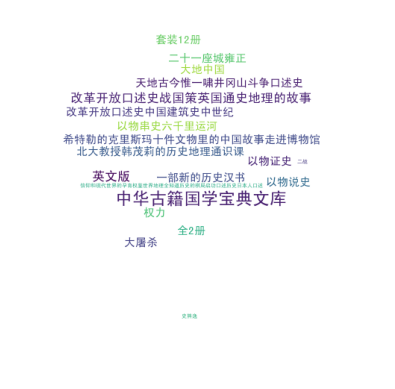

In [7]:
import matplotlib.pyplot as plt
# from scipy.misc import imread
from imageio import imread
from wordcloud import WordCloud
import jieba
from jieba import analyse

def WordcloudingKeywordsOfText(text,export_filename):
    cut_words = jieba.lcut(text)
    with open(export_filename+".txt",'w',encoding='utf-8') as f:
        f.write("/".join(cut_words))
    WC = WordCloud(
        font_path='my_font.ttf',
        background_color="#ffffff",
        max_words=20,
        mask=imread('wordcloud_back.png'),
        random_state=42
    )
    WC.generate("".join(jieba.lcut(text))
)
    plt.figure(export_filename)
    plt.imshow(WC)
    plt.axis("off")
    WC.to_file(export_filename+".png")
    ...
WordcloudingKeywordsOfText(best_titles_text,"宣传到位")
WordcloudingKeywordsOfText(worst_titles_text,"宣传不足")

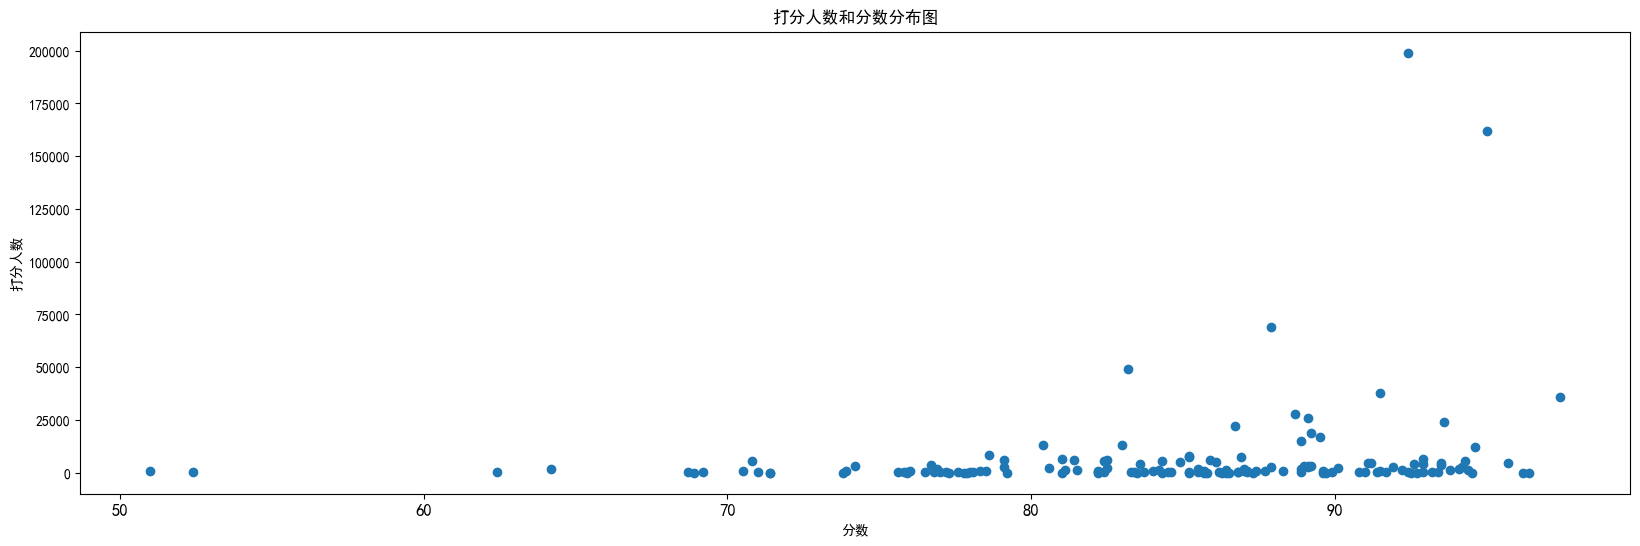

In [8]:
import matplotlib
from scipy import optimize
import numpy as np

# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
read_num = content['number'].values.tolist()
praise_num = content['mark'].values.tolist()
plt.figure(figsize=(20,6))
plt.ylabel('打分人数')
plt.xlabel('分数')
plt.xticks(fontsize=12)
# xticks = np.arange(min(praise_num), max(praise_num), 0.5)  # 设置刻度的位置，步长为0.5  
# plt.xticks(xticks, rotation=45)  # 设置刻度的位置和旋转角度  
plt.title('打分人数和分数分布图')
plt.scatter(y=read_num,x=praise_num,label="实际值")

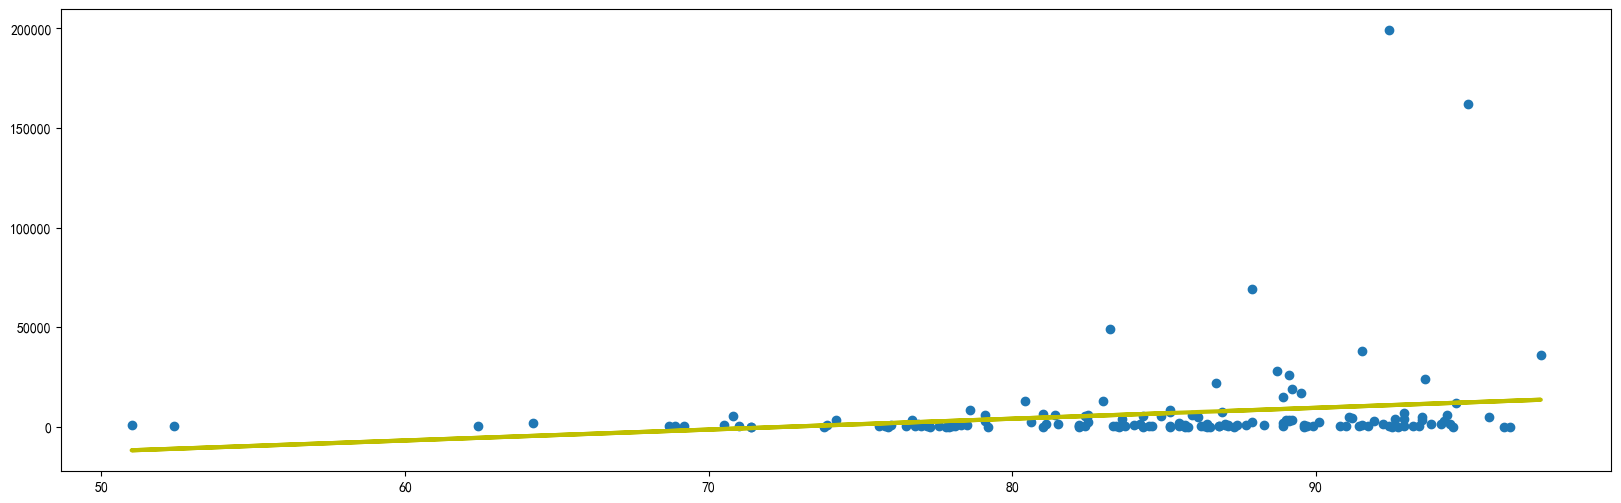

In [17]:
from sklearn.linear_model import LinearRegression
from scipy import vectorize
import numpy as np

lr = LinearRegression()
lr.fit(np.array(praise_num).reshape(-1,1),np.array(read_num).reshape(-1,1))
x1 = np.array(praise_num).reshape(-1,1)
y1 = lr.predict(x1)
# 对 np.array 每个元素取整操作，应用scipy.vectorize()函数
y1 = vectorize(lambda x:ceil(x))(y1)
plt.figure(figsize=(20,6))
plt.scatter(x1,np.array(read_num).reshape(-1,1))
plt.plot(x1,y1,"y",linewidth=3,label="最小二乘法拟合")